In [0]:
! git clone https://github.com/kierangilliam/greenthumbs.git

Cloning into 'greenthumbs'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9935 (delta 5), reused 11 (delta 5), pack-reused 9922
Receiving objects: 100% (9935/9935), 2.07 GiB | 12.91 MiB/s, done.
Resolving deltas: 100% (1487/1487), done.
Checking out files: 100% (19190/19190), done.


In [0]:
! cd /content/greenthumbs/data/v02; ls -l; git log --oneline

total 18100
-rw-r--r-- 1 root root 4347318 May  4 04:27 coco.json
drwxr-xr-x 2 root root 1122304 May  4 04:27 ds
-rw-r--r-- 1 root root    2550 May  4 04:27 meta.json
-rw-r--r-- 1 root root 1491218 May  4 04:27 test_65%_coco.json
-rw-r--r-- 1 root root 1046121 May  4 04:27 test_75%_coco.json
-rw-r--r-- 1 root root  641373 May  4 04:27 test_85%_coco.json
-rw-r--r-- 1 root root 2856903 May  4 04:27 train_65%_coco.json
-rw-r--r-- 1 root root 3302000 May  4 04:27 train_75%_coco.json
-rw-r--r-- 1 root root 3706748 May  4 04:27 train_85%_coco.json
abc8f20 (HEAD -> master, origin/master, origin/HEAD) Create train test split for v02 data
6bf1d9b Add Classic Data Augmentation
14c9f77 Add more bell pepper data
ac46102 Add more data
ace1ef3 Test smaller range of iterations
939d450 Remove colab depens
b98598b Add cv dependency to bootstrap
791529e Add detectron model train & tester
7a38144 Add boostrap script for aws instance
2bff7fd Move everything in 'tomatoes' up a level, add variations to trai

In [0]:
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

import glob
import os
import json
import cv2
import random

# load labels
obj_labels = []
os.chdir('/content/greenthumbs/data/v02')
with open('meta.json') as f:
    meta = json.load(f)
    obj_labels = [c['title'] for c in meta['classes']]

# load & shuffle files
json_paths = []
for filepath in tqdm(glob.iglob(r'/content/greenthumbs/data/v02/ds/*.json')):
    json_paths.append(filepath)
random.shuffle(json_paths)


json_paths = json_paths

resolution = 50
print(len(json_paths))
print(obj_labels)





8211it [00:00, 203045.92it/s]

6000
['tomato_fruit_unripe', 'tomato_fruit', 'tomato_seedling', 'tomato_young_plant', 'tomato_flower', 'bell_pepper_fruit', 'bell_pepper_young_plant', 'bell_pepper_flower', 'bell_pepper_fruit_unripe', 'bell_pepper_seedling', 'cucumber_flower', 'cucumber_plant', 'cucumber_seedling', 'cucumber_fruit', 'cucumber_fruit_unripe']


In [0]:
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(16),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(16),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(16),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(16),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(16, 16, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(16),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(16, 15)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

# defining the model
model = Net()
# defining the optimizer
# Adam leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. 
optimizer = Adam(model.parameters(), lr=0.05)
# defining the loss function

criterion = CrossEntropyLoss()
# # checking if GPU is available
# if torch.cuda.is_available():
#     model = model.cuda()
#     criterion = criterion.cuda()
model

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True

In [0]:
def load_batch(num_batches, i):
    batch_size = len(json_paths) // num_batches
    batch_start = i * batch_size
    batch_end = (i + 1) * batch_size

    train_test_ratio = 0.8
    images = []
    labels = []

    for json_path in json_paths[batch_start:batch_end]:
        image_path = '/content/greenthumbs/data/v02/ds/' + os.path.basename(json_path[:-5])
        if not os.path.exists(image_path):
            continue
        with open(json_path) as f:
            annotations = json.load(f)
            img = cv2.imread(image_path, 1)
            for obj in annotations['objects']:
                points = obj['points']['exterior']
                if not points:
                  print(filepath)
                # crop out image in bounding box
                crop_img = img[points[0][1]:points[1][1], points[0][0]:points[1][0]].copy()

                # Skip 0 size bounding boxes
                if crop_img.size == 0:
                    continue
                # from BGR -> RGB
                crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

                # resize to 100x100
                crop_img = cv2.resize(crop_img, (resolution, resolution))

                # normalize pixel value -> [0, 1]
                crop_img = cv2.normalize(crop_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                
                # pixel value to type float
                crop_img = crop_img.astype('float32')

                if obj['classTitle'] in obj_labels:
                    labels.append(obj_labels.index(obj['classTitle']))
                    images.append(crop_img)

    train_image_cnt = int(len(images) * train_test_ratio)
    test_images = images[train_image_cnt:]
    images = images[:train_image_cnt]
    labels = labels[:train_image_cnt]

    print(f'batch {i} [{batch_start}:{batch_end}] of: {len(images)} objects')
    train_x = np.array(images)
    train_y = np.array(labels)

    # create validation set
    train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1)
    (train_x.shape, train_y.shape, val_x.shape, val_y.shape)

    # converting training images into torch format
    train_x = train_x.reshape(train_x.shape[0], 3, resolution, resolution)
    train_x  = torch.from_numpy(train_x)

    # converting the target into torch format
    train_y = train_y.astype(int);
    train_y = torch.from_numpy(train_y)

    # converting validation images into torch format
    val_x = val_x.reshape(val_x.shape[0], 3, resolution, resolution)
    val_x  = torch.from_numpy(val_x)

    # converting the target into torch format
    val_y = val_y.astype(int);
    val_y = torch.from_numpy(val_y)

    return train_x, train_y, val_x, val_y


In [0]:
def train(epoch):
    model.train()
    tr_loss = 0

    num_batches = 20
    
    for i in range(num_batches):
        train_x, train_y, val_x, val_y = load_batch(num_batches, i)
    
        # getting the training set
        x_train, y_train = Variable(train_x), Variable(train_y)
        
        # getting the validation set
        x_val, y_val = Variable(val_x), Variable(val_y)
        
        # converting the data into GPU format
        # if torch.cuda.is_available():
        #     x_train = x_train.cuda()
        #     y_train = y_train.cuda()
        #     x_val = x_val.cuda()
        #     y_val = y_val.cuda()
        
        # prediction for training and validation set
        output_train = model(x_train)
        output_val = model(x_val)

        # clearing the Gradients of the model parameters
        optimizer.zero_grad()

        # computing the training and validation loss
        loss_train = criterion(output_train, y_train)
        loss_val = criterion(output_val, y_val)
        train_losses.append(loss_train)
        val_losses.append(loss_val)

        # computing the updated weights of all the model parameters
        loss_train.backward()
        optimizer.step()
        # tr_loss = loss_train.item()
        torch.cuda.empty_cache()
    print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

        
# defining the number of epochs
n_epochs = 50
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

batch 0 [0:300] of: 788 objects
batch 1 [300:600] of: 761 objects
batch 2 [600:900] of: 815 objects
batch 3 [900:1200] of: 824 objects
batch 4 [1200:1500] of: 731 objects
batch 5 [1500:1800] of: 733 objects
batch 6 [1800:2100] of: 722 objects
batch 7 [2100:2400] of: 795 objects
batch 8 [2400:2700] of: 696 objects
batch 9 [2700:3000] of: 743 objects
batch 10 [3000:3300] of: 767 objects
batch 11 [3300:3600] of: 718 objects
batch 12 [3600:3900] of: 691 objects
batch 13 [3900:4200] of: 741 objects
batch 14 [4200:4500] of: 781 objects
batch 15 [4500:4800] of: 749 objects
batch 16 [4800:5100] of: 773 objects
batch 17 [5100:5400] of: 702 objects
batch 18 [5400:5700] of: 755 objects
batch 19 [5700:6000] of: 831 objects
Epoch :  1 	 loss : tensor(0.7834, grad_fn=<NllLossBackward>)
batch 0 [0:300] of: 788 objects
batch 1 [300:600] of: 761 objects
batch 2 [600:900] of: 815 objects
batch 3 [900:1200] of: 824 objects
batch 4 [1200:1500] of: 731 objects
batch 5 [1500:1800] of: 733 objects
batch 6 [1

In [0]:
# Save model as pth file

torch.save(model.state_dict(), 'classifier_model.pth')

In [0]:
# Load model back
model = Net()
model.load_state_dict(torch.load('classifier_model.pth'))
model.eval()
if torch.cuda.is_available():
    model = model.cuda()

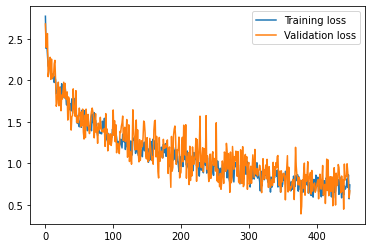

In [0]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()


100%|██████████| 4000/4000 [00:46<00:00, 85.21it/s]


10072
10072
tomato_seedling
cucumber_fruit
cucumber_fruit
cucumber_fruit
cucumber_flower
cucumber_flower
bell_pepper_young_plant
cucumber_flower
tomato_flower
(10072, 50, 50, 3)


0.6233089239170907

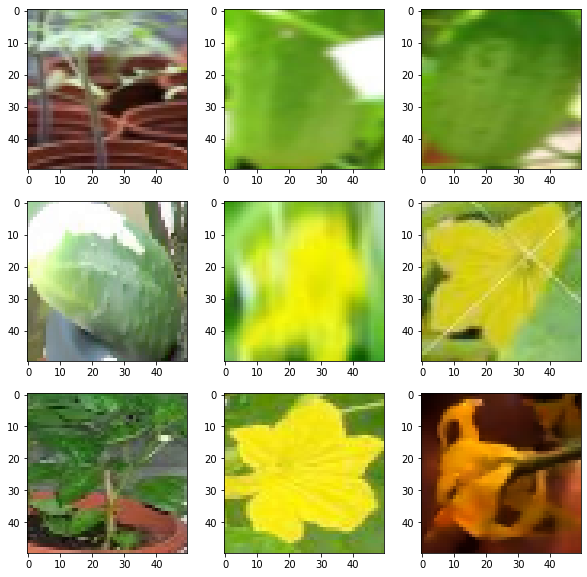

In [0]:
train_test_ratio = 0.8

images = []
labels = []

for json_path in tqdm(json_paths[:4000]):
    image_path = '/content/greenthumbs/data/v02/ds/' + os.path.basename(json_path[:-5])
    if not os.path.exists(image_path):
        continue
    with open(json_path) as f:
        annotations = json.load(f)
        img = cv2.imread(image_path, 1)
        for obj in annotations['objects']:
            points = obj['points']['exterior']
            if not points:
              print(filepath)
            # crop out image in bounding box
            crop_img = img[points[0][1]:points[1][1], points[0][0]:points[1][0]].copy()

            # Skip 0 size bounding boxes
            if crop_img.size == 0:
                continue
            # print(crop_img)
            # from BGR -> RGB
            crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)

            # resize to 100x100
            crop_img = cv2.resize(crop_img, (resolution, resolution))

            # normalize pixel value -> [0, 1]
            crop_img = cv2.normalize(crop_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            
            # pixel value to type float
            crop_img = crop_img.astype('float32')

            if obj['classTitle'] in obj_labels:
                labels.append(obj_labels.index(obj['classTitle']))
                images.append(crop_img)

# print(pd.DataFrame(labels).describe())

train_image_cnt = int(len(images) * train_test_ratio)

test_images = images[train_image_cnt:]

images = images[:train_image_cnt]
labels = labels[:train_image_cnt]

print(len(images))
print(len(labels))
i = 0

plt.figure(figsize=(10,10))
plt.subplot(331), plt.imshow(images[i])
plt.subplot(332), plt.imshow(images[i+25])
plt.subplot(333), plt.imshow(images[i+26])
plt.subplot(334), plt.imshow(images[i+137])
plt.subplot(335), plt.imshow(images[i+50])
plt.subplot(336), plt.imshow(images[i+116])
plt.subplot(337), plt.imshow(images[i+30])
plt.subplot(338), plt.imshow(images[i+111])
plt.subplot(339), plt.imshow(images[i+160])

print(obj_labels[labels[i]])
print(obj_labels[labels[i+25]])
print(obj_labels[labels[i+26]])
print(obj_labels[labels[i+137]])
print(obj_labels[labels[i+50]])
print(obj_labels[labels[i+116]])
print(obj_labels[labels[i+30]])
print(obj_labels[labels[i+111]])
print(obj_labels[labels[i+160]])

train_x = np.array(images)
train_y = np.array(labels)
print(train_x.shape)

# create validation set
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.2)
(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

# converting training images into torch format
train_x = train_x.reshape(train_x.shape[0], 3, resolution, resolution)
train_x  = torch.from_numpy(train_x)

# converting the target into torch format
train_y = train_y.astype(int);
train_y = torch.from_numpy(train_y)

# shape of training data
train_x.shape, train_y.shape

# converting validation images into torch format
val_x = val_x.reshape(val_x.shape[0], 3, resolution, resolution)
val_x  = torch.from_numpy(val_x)

# converting the target into torch format
val_y = val_y.astype(int);
val_y = torch.from_numpy(val_y)

# shape of validation data
val_x.shape, val_y.shape

# prediction for training set
with torch.no_grad():
    output = model(train_x.cuda())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

In [0]:
# prediction for validation set
with torch.no_grad():
    output = model(val_x.cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on validation set
accuracy_score(val_y, predictions)

0.6004962779156328

In [0]:
# converting the list to numpy array
test_x = np.array(test_images)
# converting training images into torch format
test_x = test_x.reshape(len(test_images), 3, resolution, resolution)
test_x  = torch.from_numpy(test_x)
test_x.shape

torch.Size([2518, 3, 50, 50])

In [0]:
# generating predictions for test set
with torch.no_grad():
    output = model(test_x.cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)
predictions

array([10, 10, 13, ...,  4,  4,  4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


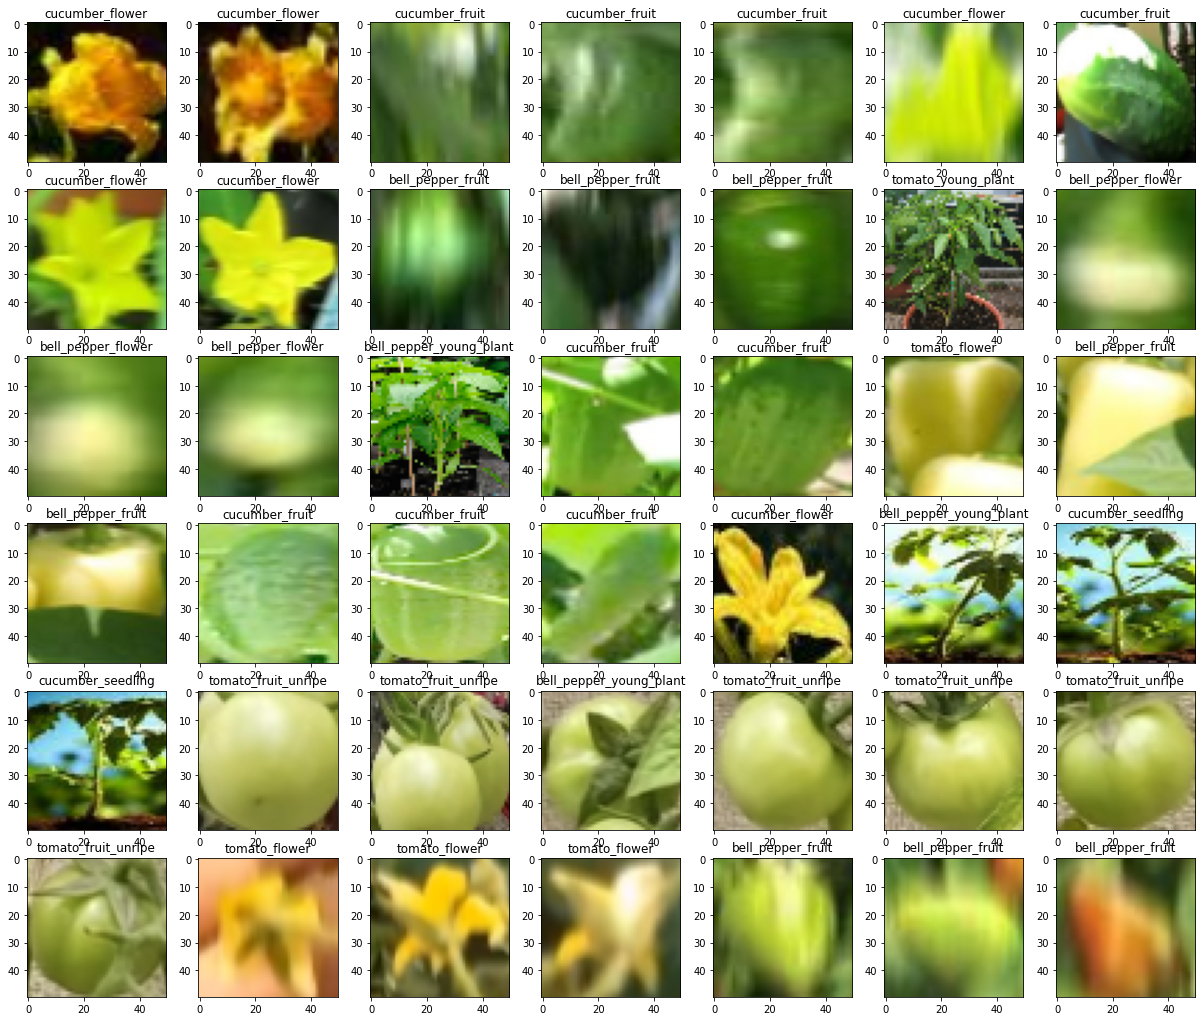

In [0]:
test_images = test_images[:42]
column_size = 7
row_size = int(len(test_images) / column_size + 1)

fig = plt.figure(figsize=(column_size * 3,row_size * 3))

for i, test_image in enumerate(test_images):
    sp = plt.subplot2grid((row_size, column_size), (i // column_size,i % column_size))
    sp.title.set_text(obj_labels[predictions[i]])
    sp.imshow(test_images[i])

plt.show()

In [0]:
# Save model as pth file

torch.save(model.state_dict(), 'classifier_model.pth')

In [0]:
! ls -l

In [0]:
# Load model back

model = Net()
model.load_state_dict(torch.load('classifier_model.pth'))
model.eval()

if torch.cuda.is_available():
    model = model.cuda()

In [0]:
# Redo test set prediction with loaded model

# generating predictions for test set
with torch.no_grad():
    output = model(test_x.cuda())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions2 = np.argmax(prob, axis=1)
print(f'predictions before save: {predictions}')
print(f'predictions after  save: {predictions2}')

